# Getting Started with Grid Status API

This notebook demonstrates how to use the Grid Status API to retrieve and visualize data about electricity grid datasets.

For more information about the API, please visit: https://www.gridstatus.io/api

To retrieve your API key, create a Grid Status account and go to the [settings page](https://www.gridstatus.io/settings/api) to get your API key.

In [1]:
# Run to get latest version of client
# %pip install --upgrade gridstatusio

In [2]:
from gridstatusio import GridStatusClient

## Setting up the API client

First, we need to set up the GridStatusClient by providing our API key. You can either set the API key using the `GRIDSTATUS_API_KEY` environment variable or pass it to the constructor directly.

In [3]:
# client = GridStatusClient(api_key="YOUR_API_KEY_HERE")
client = GridStatusClient()

GridStatusClient(host=https://api.gridstatus.io/v1)

## Listing datasets

To search for datasets, you can use the `list_datasets` method. You can list all available datasets or provide a filter term to search for specific datasets.

In [4]:
client.list_datasets(filter_term="ERCOT SPP")

+-------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|           Key           |                                                                                    Value                                                                                     |
+-------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|          Name           |                                                                          ERCOT SPP Day Ahead Hourly                                                                          |
|           ID            |                                                                          ercot_spp_day_ahead_hourly                                                             

## Retrieving data from a dataset

You can retrieve data from a dataset by specifying its ID and the date range. By default, the data is returned in UTC.

**Make sure to always set a `limit` for your queries to avoid exceeding the monthly row limit for your API key**

In [5]:
QUERY_LIMIT = 10_000

10000

In [6]:
data_utc = client.get_dataset(
    dataset="ercot_spp_day_ahead_hourly",
    start="2023-04-01",
    end="2023-04-03",
    limit=QUERY_LIMIT,
)

data_utc

Fetching Page 1...Done in 0.38 seconds. 
Total rows: 10,000/10,000 (100.0% of limit)

Total number of rows: 10000


interval_start_utc          interval_end_utc      location  \
0    2023-04-01 00:00:00+00:00 2023-04-01 01:00:00+00:00          AEEC   
1    2023-04-01 00:00:00+00:00 2023-04-01 01:00:00+00:00  AGUAYO_UNIT1   
2    2023-04-01 00:00:00+00:00 2023-04-01 01:00:00+00:00   AJAXWIND_RN   
3    2023-04-01 00:00:00+00:00 2023-04-01 01:00:00+00:00  ALGOD_ALL_RN   
4    2023-04-01 00:00:00+00:00 2023-04-01 01:00:00+00:00      ALVIN_RN   
...                        ...                       ...           ...   
9995 2023-04-01 12:00:00+00:00 2023-04-01 13:00:00+00:00      BTE_PUN1   
9996 2023-04-01 12:00:00+00:00 2023-04-01 13:00:00+00:00      BTE_PUN2   
9997 2023-04-01 12:00:00+00:00 2023-04-01 13:00:00+00:00       BTM_ALL   
9998 2023-04-01 12:00:00+00:00 2023-04-01 13:00:00+00:00    BUCHAN_ALL   
9999 2023-04-01 12:00:00+00:00 2023-04-01 13:00:00+00:00   BUCKTHRN_RN   

      location_type            market      spp  
0     Resource Node  DAY_AHEAD_HOURLY -21.7800  
1     Resource Node  DAY_AHEAD_HOURLY  37.3000  
2     Resource Node  DAY_AHEAD_HOURLY  25.7600  
3     Resource Node  DAY_AHEAD_HOURLY  52.9000  
4     Resource Node  DAY_AHEAD_HOURLY  46.1100  
...             ...               ...      ...  
9995  Resource Node  DAY_AHEAD_HOURLY  21.3500  
9996  Resource Node  DAY_AHEAD_HOURLY  21.3500  
9997  Resource Node  DAY_AHEAD_HOURLY  21.4700  
9998  Resource Node  DAY_AHEAD_HOURLY  21.4000  
9999  Resource Node  DAY_AHEAD_HOURLY  20.2700  

[10000 rows x 6 columns]

## Retrieving data in local time

If you want to retrieve data in local time instead of UTC, you can pass `timezone` to the `get_dataset` method. The resulting data will have `_local` columns in the `timezone` and `_utc` columns in UTC.

In [7]:
data_local = client.get_dataset(
    dataset="ercot_spp_day_ahead_hourly",
    start="2023-04-01",
    end="2023-04-03",
    timezone="US/Central",
    limit=QUERY_LIMIT,
)

data_local

Fetching Page 1...Done in 0.47 seconds. 
Total rows: 10,000/10,000 (100.0% of limit)

Total number of rows: 10000


interval_start_local        interval_start_utc  \
0    2023-04-01 00:00:00-05:00 2023-04-01 05:00:00+00:00   
1    2023-04-01 00:00:00-05:00 2023-04-01 05:00:00+00:00   
2    2023-04-01 00:00:00-05:00 2023-04-01 05:00:00+00:00   
3    2023-04-01 00:00:00-05:00 2023-04-01 05:00:00+00:00   
4    2023-04-01 00:00:00-05:00 2023-04-01 05:00:00+00:00   
...                        ...                       ...   
9995 2023-04-01 12:00:00-05:00 2023-04-01 17:00:00+00:00   
9996 2023-04-01 12:00:00-05:00 2023-04-01 17:00:00+00:00   
9997 2023-04-01 12:00:00-05:00 2023-04-01 17:00:00+00:00   
9998 2023-04-01 12:00:00-05:00 2023-04-01 17:00:00+00:00   
9999 2023-04-01 12:00:00-05:00 2023-04-01 17:00:00+00:00   

            interval_end_local          interval_end_utc      location  \
0    2023-04-01 01:00:00-05:00 2023-04-01 06:00:00+00:00          AEEC   
1    2023-04-01 01:00:00-05:00 2023-04-01 06:00:00+00:00  AGUAYO_UNIT1   
2    2023-04-01 01:00:00-05:00 2023-04-01 06:00:00+00:00   AJAXWIND_RN   
3    2023-04-01 01:00:00-05:00 2023-04-01 06:00:00+00:00  ALGOD_ALL_RN   
4    2023-04-01 01:00:00-05:00 2023-04-01 06:00:00+00:00      ALVIN_RN   
...                        ...                       ...           ...   
9995 2023-04-01 13:00:00-05:00 2023-04-01 18:00:00+00:00      BTE_PUN1   
9996 2023-04-01 13:00:00-05:00 2023-04-01 18:00:00+00:00      BTE_PUN2   
9997 2023-04-01 13:00:00-05:00 2023-04-01 18:00:00+00:00       BTM_ALL   
9998 2023-04-01 13:00:00-05:00 2023-04-01 18:00:00+00:00    BUCHAN_ALL   
9999 2023-04-01 13:00:00-05:00 2023-04-01 18:00:00+00:00   BUCKTHRN_RN   

      location_type            market      spp  
0     Resource Node  DAY_AHEAD_HOURLY -65.2400  
1     Resource Node  DAY_AHEAD_HOURLY  20.0900  
2     Resource Node  DAY_AHEAD_HOURLY   7.6500  
3     Resource Node  DAY_AHEAD_HOURLY  22.8400  
4     Resource Node  DAY_AHEAD_HOURLY  19.7700  
...             ...               ...      ...  
9995  Resource Node  DAY_AHEAD_HOURLY  41.0300  
9996  Resource Node  DAY_AHEAD_HOURLY  41.0300  
9997  Resource Node  DAY_AHEAD_HOURLY  40.4100  
9998  Resource Node  DAY_AHEAD_HOURLY  37.1900  
9999  Resource Node  DAY_AHEAD_HOURLY  35.3400  

[10000 rows x 8 columns]

## Filtering data in the query

You can also filter data in your query by specifying a filter column and filter value. This can be helpful when you want to retrieve data for a specific location or node. For example, let's get the average day ahead price for the Houston Hub in April 2023.

In [8]:
data_houston_apr = client.get_dataset(
    dataset="ercot_spp_day_ahead_hourly",
    start="2023-04-01",
    end="2023-05-01",
    filter_column="location",
    filter_value="HB_HOUSTON",
    timezone="US/Central",
    limit=QUERY_LIMIT,
)

data_houston_apr

Fetching Page 1...Done in 0.59 seconds. 
Total rows: 720/10,000 (7.2% of limit)

Total number of rows: 720


interval_start_local        interval_start_utc  \
0   2023-04-01 00:00:00-05:00 2023-04-01 05:00:00+00:00   
1   2023-04-01 01:00:00-05:00 2023-04-01 06:00:00+00:00   
2   2023-04-01 02:00:00-05:00 2023-04-01 07:00:00+00:00   
3   2023-04-01 03:00:00-05:00 2023-04-01 08:00:00+00:00   
4   2023-04-01 04:00:00-05:00 2023-04-01 09:00:00+00:00   
..                        ...                       ...   
715 2023-04-30 19:00:00-05:00 2023-05-01 00:00:00+00:00   
716 2023-04-30 20:00:00-05:00 2023-05-01 01:00:00+00:00   
717 2023-04-30 21:00:00-05:00 2023-05-01 02:00:00+00:00   
718 2023-04-30 22:00:00-05:00 2023-05-01 03:00:00+00:00   
719 2023-04-30 23:00:00-05:00 2023-05-01 04:00:00+00:00   

           interval_end_local          interval_end_utc    location  \
0   2023-04-01 01:00:00-05:00 2023-04-01 06:00:00+00:00  HB_HOUSTON   
1   2023-04-01 02:00:00-05:00 2023-04-01 07:00:00+00:00  HB_HOUSTON   
2   2023-04-01 03:00:00-05:00 2023-04-01 08:00:00+00:00  HB_HOUSTON   
3   2023-04-01 04:00:00-05:00 2023-04-01 09:00:00+00:00  HB_HOUSTON   
4   2023-04-01 05:00:00-05:00 2023-04-01 10:00:00+00:00  HB_HOUSTON   
..                        ...                       ...         ...   
715 2023-04-30 20:00:00-05:00 2023-05-01 01:00:00+00:00  HB_HOUSTON   
716 2023-04-30 21:00:00-05:00 2023-05-01 02:00:00+00:00  HB_HOUSTON   
717 2023-04-30 22:00:00-05:00 2023-05-01 03:00:00+00:00  HB_HOUSTON   
718 2023-04-30 23:00:00-05:00 2023-05-01 04:00:00+00:00  HB_HOUSTON   
719 2023-05-01 00:00:00-05:00 2023-05-01 05:00:00+00:00  HB_HOUSTON   

    location_type            market     spp  
0     Trading Hub  DAY_AHEAD_HOURLY 19.4400  
1     Trading Hub  DAY_AHEAD_HOURLY 17.3800  
2     Trading Hub  DAY_AHEAD_HOURLY 16.7400  
3     Trading Hub  DAY_AHEAD_HOURLY 16.6800  
4     Trading Hub  DAY_AHEAD_HOURLY 18.5500  
..            ...               ...     ...  
715   Trading Hub  DAY_AHEAD_HOURLY 34.0700  
716   Trading Hub  DAY_AHEAD_HOURLY 26.9400  
717   Trading Hub  DAY_AHEAD_HOURLY 19.5100  
718   Trading Hub  DAY_AHEAD_HOURLY 17.7100  
719   Trading Hub  DAY_AHEAD_HOURLY 16.6200  

[720 rows x 8 columns]

## Filter Operators

You can also use the `filter_operator` parameter to specify how to filter the data. For example, we can use the `in` operator to get data for both Houston and West Texas.

Supports "=", "!=", ">", "<", ">=", "<=", and "in". Defaults to "=".

In [9]:
data_both_apr = client.get_dataset(
    dataset="ercot_spp_day_ahead_hourly",
    start="2023-04-01",
    end="2023-05-01",
    filter_column="location",
    filter_operator="in",
    filter_value=["HB_HOUSTON", "HB_WEST"],
    timezone="US/Central",
    limit=QUERY_LIMIT,
)

data_both_apr

Fetching Page 1...Done in 0.28 seconds. 
Total rows: 1,440/10,000 (14.4% of limit)

Total number of rows: 1440


interval_start_local        interval_start_utc  \
0    2023-04-01 00:00:00-05:00 2023-04-01 05:00:00+00:00   
1    2023-04-01 00:00:00-05:00 2023-04-01 05:00:00+00:00   
2    2023-04-01 01:00:00-05:00 2023-04-01 06:00:00+00:00   
3    2023-04-01 01:00:00-05:00 2023-04-01 06:00:00+00:00   
4    2023-04-01 02:00:00-05:00 2023-04-01 07:00:00+00:00   
...                        ...                       ...   
1435 2023-04-30 21:00:00-05:00 2023-05-01 02:00:00+00:00   
1436 2023-04-30 22:00:00-05:00 2023-05-01 03:00:00+00:00   
1437 2023-04-30 22:00:00-05:00 2023-05-01 03:00:00+00:00   
1438 2023-04-30 23:00:00-05:00 2023-05-01 04:00:00+00:00   
1439 2023-04-30 23:00:00-05:00 2023-05-01 04:00:00+00:00   

            interval_end_local          interval_end_utc    location  \
0    2023-04-01 01:00:00-05:00 2023-04-01 06:00:00+00:00  HB_HOUSTON   
1    2023-04-01 01:00:00-05:00 2023-04-01 06:00:00+00:00     HB_WEST   
2    2023-04-01 02:00:00-05:00 2023-04-01 07:00:00+00:00  HB_HOUSTON   
3    2023-04-01 02:00:00-05:00 2023-04-01 07:00:00+00:00     HB_WEST   
4    2023-04-01 03:00:00-05:00 2023-04-01 08:00:00+00:00  HB_HOUSTON   
...                        ...                       ...         ...   
1435 2023-04-30 22:00:00-05:00 2023-05-01 03:00:00+00:00     HB_WEST   
1436 2023-04-30 23:00:00-05:00 2023-05-01 04:00:00+00:00  HB_HOUSTON   
1437 2023-04-30 23:00:00-05:00 2023-05-01 04:00:00+00:00     HB_WEST   
1438 2023-05-01 00:00:00-05:00 2023-05-01 05:00:00+00:00  HB_HOUSTON   
1439 2023-05-01 00:00:00-05:00 2023-05-01 05:00:00+00:00     HB_WEST   

     location_type            market     spp  
0      Trading Hub  DAY_AHEAD_HOURLY 19.4400  
1      Trading Hub  DAY_AHEAD_HOURLY 49.0700  
2      Trading Hub  DAY_AHEAD_HOURLY 17.3800  
3      Trading Hub  DAY_AHEAD_HOURLY 47.6100  
4      Trading Hub  DAY_AHEAD_HOURLY 16.7400  
...            ...               ...     ...  
1435   Trading Hub  DAY_AHEAD_HOURLY 16.1200  
1436   Trading Hub  DAY_AHEAD_HOURLY 17.7100  
1437   Trading Hub  DAY_AHEAD_HOURLY 14.4800  
1438   Trading Hub  DAY_AHEAD_HOURLY 16.6200  
1439   Trading Hub  DAY_AHEAD_HOURLY 15.7100  

[1440 rows x 8 columns]

## Visualizing the data

Now that we have retrieved the data for the Houston Hub vs West Hub in April 2023, let's plot it using Plotly

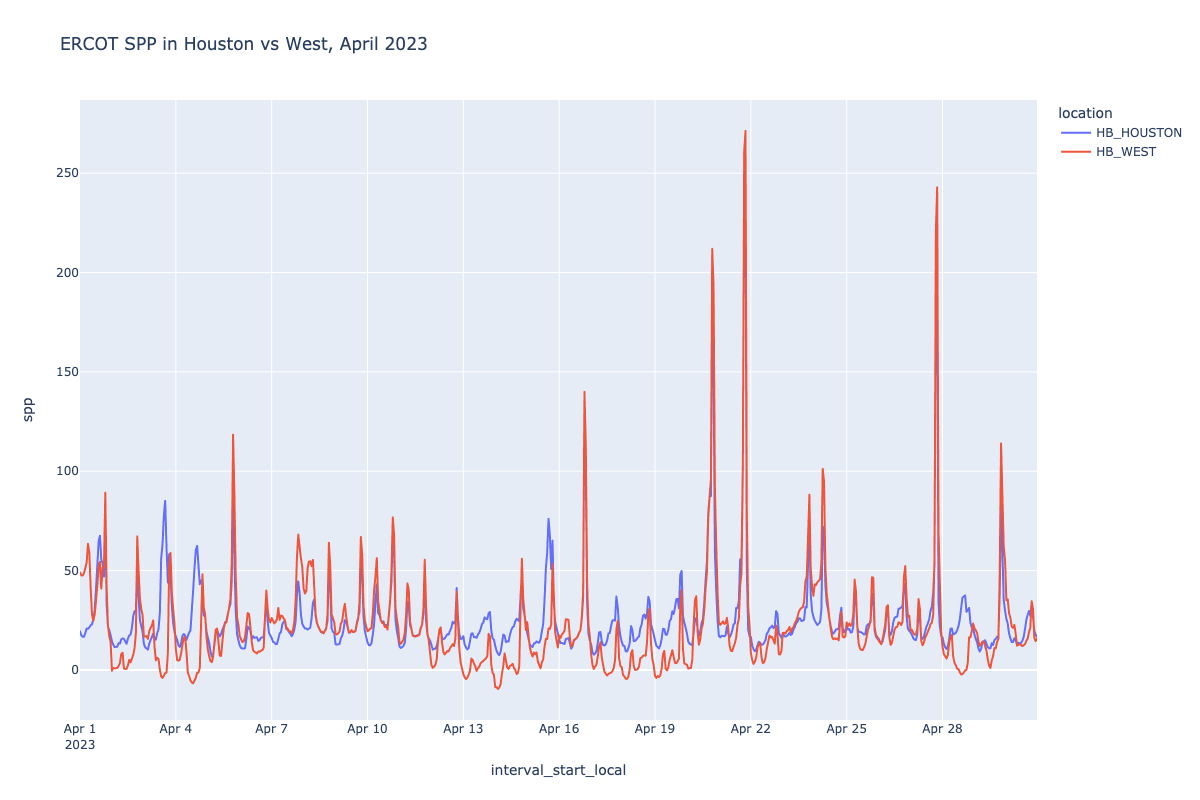

In [10]:
import plotly.express as px

fig = px.line(
    data_both_apr,
    x="interval_start_local",
    y="spp",
    color="location",
    title="ERCOT SPP in Houston vs West, April 2023",
)
fig.show("png", width=1200, height=800)

## Selecting Subset of Columns

We can select a subset of columns by passing a list of column names to the `columns` parameter. For example, if we want the output for a particular wind resource

In [11]:
big_star = client.get_dataset(
    dataset="ercot_sced_gen_resource_60_day",
    start="2023-04-02",
    end="2023-04-03",
    columns=[
        "interval_start_utc",
        "interval_end_utc",
        "resource_name",
        "resource_type",
        "telemetered_net_output",
    ],
    filter_column="resource_name",
    filter_operator="in",
    filter_value=["BIG_STAR_UNIT1", "BIG_STAR_UNIT2"],
    timezone="US/Central",
    limit=QUERY_LIMIT,
)

big_star

Fetching Page 1...Done in 0.33 seconds. 
Total rows: 192/10,000 (1.92% of limit)

Total number of rows: 192


interval_start_local        interval_start_utc  \
0   2023-04-02 00:00:00-05:00 2023-04-02 05:00:00+00:00   
1   2023-04-02 00:00:00-05:00 2023-04-02 05:00:00+00:00   
2   2023-04-02 00:15:00-05:00 2023-04-02 05:15:00+00:00   
3   2023-04-02 00:15:00-05:00 2023-04-02 05:15:00+00:00   
4   2023-04-02 00:30:00-05:00 2023-04-02 05:30:00+00:00   
..                        ...                       ...   
187 2023-04-02 23:15:00-05:00 2023-04-03 04:15:00+00:00   
188 2023-04-02 23:30:00-05:00 2023-04-03 04:30:00+00:00   
189 2023-04-02 23:30:00-05:00 2023-04-03 04:30:00+00:00   
190 2023-04-02 23:45:00-05:00 2023-04-03 04:45:00+00:00   
191 2023-04-02 23:45:00-05:00 2023-04-03 04:45:00+00:00   

           interval_end_local          interval_end_utc   resource_name  \
0   2023-04-02 00:15:00-05:00 2023-04-02 05:15:00+00:00  BIG_STAR_UNIT1   
1   2023-04-02 00:15:00-05:00 2023-04-02 05:15:00+00:00  BIG_STAR_UNIT2   
2   2023-04-02 00:30:00-05:00 2023-04-02 05:30:00+00:00  BIG_STAR_UNIT1   
3   2023-04-02 00:30:00-05:00 2023-04-02 05:30:00+00:00  BIG_STAR_UNIT2   
4   2023-04-02 00:45:00-05:00 2023-04-02 05:45:00+00:00  BIG_STAR_UNIT1   
..                        ...                       ...             ...   
187 2023-04-02 23:30:00-05:00 2023-04-03 04:30:00+00:00  BIG_STAR_UNIT2   
188 2023-04-02 23:45:00-05:00 2023-04-03 04:45:00+00:00  BIG_STAR_UNIT1   
189 2023-04-02 23:45:00-05:00 2023-04-03 04:45:00+00:00  BIG_STAR_UNIT2   
190 2023-04-03 00:00:00-05:00 2023-04-03 05:00:00+00:00  BIG_STAR_UNIT1   
191 2023-04-03 00:00:00-05:00 2023-04-03 05:00:00+00:00  BIG_STAR_UNIT2   

    resource_type  telemetered_net_output  
0            PVGR                  0.0000  
1            PVGR                  0.0000  
2            PVGR                  0.0000  
3            PVGR                  0.0000  
4            PVGR                  0.0000  
..            ...                     ...  
187          PVGR                  0.0000  
188          PVGR                  0.0000  
189          PVGR                  0.0000  
190          PVGR                  0.0000  
191          PVGR                  0.0000  

[192 rows x 7 columns]

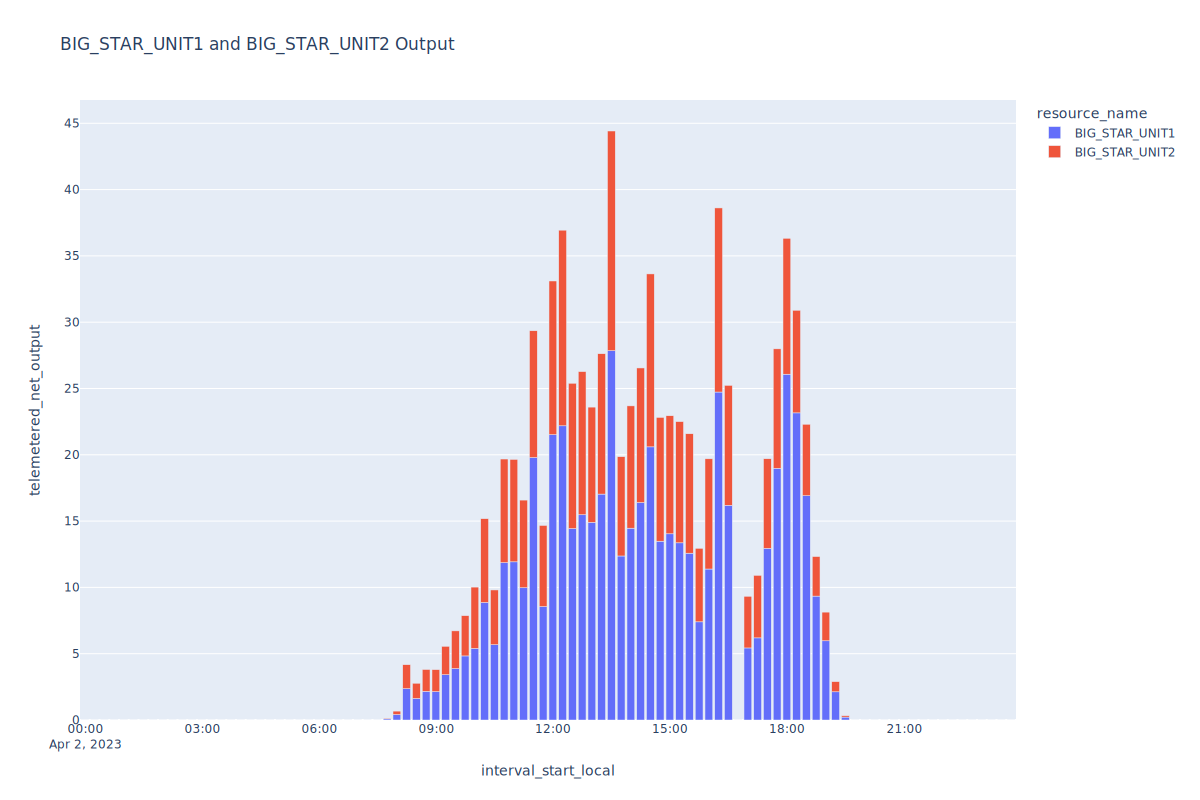

In [12]:
fig = px.bar(
    big_star,
    x="interval_start_local",
    y="telemetered_net_output",
    color="resource_name",
    title="BIG_STAR_UNIT1 and BIG_STAR_UNIT2 Output",
)

fig.show("svg", width=1200, height=800)